<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/20231211/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


remove all files in /content/drive/MyDrive

In [10]:
# import os

# for file in os.listdir('/content/drive/MyDrive'):
#   full_path = '/content/drive/MyDrive/' + file
#   if os.path.isfile(full_path):
#     os.remove(full_path)

/content/drive/MyDrive/drone_data

In [15]:
# !rm -rf /content/drive/MyDrive/with_drone

Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/drone_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_drone_data/drone"

In [20]:
import os
import cv2
import shutil

# Set the paths
input_folder = "/content/drive/MyDrive/drone_data"
output_folder = "/content/drive/MyDrive/my_drone_data/drone"


# Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# Iterate through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".txt")):
        file_path = os.path.join(input_folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Load the image
            image = cv2.imread(file_path)

            # Assume there's a corresponding text file with YOLO format bounding box coordinates
            txt_file_path = os.path.join(input_folder, filename.replace(".jpg", ".txt"))

            # Check if the corresponding text file exists
            if os.path.exists(txt_file_path):
                # Read YOLO format coordinates from the text file
                with open(txt_file_path, 'r') as txt_file:
                    lines = txt_file.readlines()
                    for line in lines:
                        # Parse the coordinates and crop the drone
                        # Note: You may need to adjust the code based on the format of your bounding box coordinates
                        class_label, center_x, center_y, width, height = map(float, line.strip().split())
                        x = int((center_x - width / 2) * image.shape[1])
                        y = int((center_y - height / 2) * image.shape[0])
                        w = int(width * image.shape[1])
                        h = int(height * image.shape[0])
                        cropped_drone = image[y:y + h, x:x + w]

                        # Save the cropped image in the "with_drone" folder
                        output_path = os.path.join(output_folder, f"{filename.replace('.jpg', '')}_cropped.jpg")
                        cv2.imwrite(output_path, cropped_drone)

                        # Save YOLOv8 format annotation file in the "yolo_format" folder
                        # yolo_annotation_path = os.path.join(yolo_folder, f"{filename.replace('.jpg', '')}.txt")
                        # with open(yolo_annotation_path, 'a') as yolo_file:
                            # Write YOLOv8 format coordinates (class x_center y_center width height)
                            # yolo_file.write(f"{int(class_label)} {center_x} {center_y} {width} {height}\n")

print("Processing complete.")


Processing complete.


In [ ]:
import os
import cv2
import shutil
import random

# Set the paths
input_folder = "/content/drive/MyDrive"
with_drone_folder = "/content/drive/MyDrive/with_drone"
without_drone_folder = "/content/drive/MyDrive/without_drone"

# Create the output folders if they don't exist
os.makedirs(with_drone_folder, exist_ok=True)
os.makedirs(without_drone_folder, exist_ok=True)

# Iterate through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".txt")):
        file_path = os.path.join(input_folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Load the image
            image = cv2.imread(file_path)

            # Assume there's a corresponding text file with YOLO format bounding box coordinates
            txt_file_path = os.path.join(input_folder, filename.replace(".jpg", ".txt"))

            # Check if the corresponding text file exists
            if os.path.exists(txt_file_path):
                # Read YOLO format coordinates from the text file
                with open(txt_file_path, 'r') as txt_file:
                    lines = txt_file.readlines()
                    for line in lines:
                        # Parse the coordinates and crop the drone
                        # Note: You may need to adjust the code based on the format of your bounding box coordinates
                        class_label, center_x, center_y, width, height = map(float, line.strip().split())
                        x = int((center_x - width / 2) * image.shape[1])
                        y = int((center_y - height / 2) * image.shape[0])
                        w = int(width * image.shape[1])
                        h = int(height * image.shape[0])
                        cropped_drone = image[y:y + h, x:x + w]

                        # Save the cropped image in the "with_drone" folder
                        with_drone_output_path = os.path.join(with_drone_folder, f"{filename.replace('.jpg', '')}_cropped.jpg")
                        cv2.imwrite(with_drone_output_path, cropped_drone)

            # Crop a random 28x28 region and save it to the "without_drone" folder
            h, w, _ = image.shape
            if h > 28 and w > 28:
                random_y = random.randint(0, h - 28)
                random_x = random.randint(0, w - 28)
                cropped_without_drone = image[random_y:random_y + 28, random_x:random_x + 28]

                without_drone_output_path = os.path.join(without_drone_folder, f"{filename.replace('.jpg', '')}_cropped.jpg")
                cv2.imwrite(without_drone_output_path, cropped_without_drone)

print("Processing complete.")


Processing complete.


take all the dataset in "with_drone" and "without_drone" and separate to new files "train" and "test". 85% will go to train  and 15% for test

In [ ]:
import os
import cv2
import shutil
import random

# Set the paths
with_drone_folder = "/content/drive/MyDrive/with_drone"
without_drone_folder = "/content/drive/MyDrive/without_drone"
train_folder = "/content/drive/MyDrive/train"
test_folder = "/content/drive/MyDrive/test"

# Create the output folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Function to move files to train or test folder based on the ratio
def move_files(src_folder, dest_train_folder, dest_test_folder, ratio):
    files = os.listdir(src_folder)
    random.shuffle(files)
    split_index = int(len(files) * ratio)
    train_files = files[:split_index]
    test_files = files[split_index:]

    for filename in train_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_train_folder, filename)
        shutil.move(src_path, dest_path)

    for filename in test_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_test_folder, filename)
        shutil.move(src_path, dest_path)

# Move files for the "with_drone" folder
move_files(with_drone_folder, train_folder, test_folder, ratio=0.85)

# Move files for the "without_drone" folder
move_files(without_drone_folder, train_folder, test_folder, ratio=0.85)

print("Dataset split into train and test sets.")


Dataset split into train and test sets.


give me a report on the files in train and test

In [ ]:
def generate_report(folder):
    file_count = len(os.listdir(folder))
    return f"{folder}: {file_count} files"

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/train"
test_folder = "/content/drive/MyDrive/test"

# Generate reports for train and test folders
train_report = generate_report(train_folder)
test_report = generate_report(test_folder)

# Print the reports
print(train_report)
print(test_report)


/content/drive/MyDrive/train: 843 files
/content/drive/MyDrive/test: 238 files


take all the images in train and test and make sure they're 28 * 28, if not resize them

In [ ]:
import os
import cv2

# Function to resize images in a folder
def resize_images(folder, target_size=(28, 28)):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path)

            # Resize the image to the target size
            resized_image = cv2.resize(image, target_size)

            # Save the resized image back to the file
            cv2.imwrite(file_path, resized_image)

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/train"
test_folder = "/content/drive/MyDrive/test"

# Resize images in the train and test folders
resize_images(train_folder)
resize_images(test_folder)

print("Images in train and test sets resized to 28x28.")


Images in train and test sets resized to 28x28.


In [ ]:
import os
import cv2

# Function to generate a resolution report for a folder
def generate_resolution_report(folder):
    resolutions = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path)

            # Get the resolution (height and width) of the image
            height, width, _ = image.shape
            resolutions.append((height, width))

    return resolutions

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/train"
test_folder = "/content/drive/MyDrive/test"

# Generate resolution reports for train and test folders
train_resolution_report = generate_resolution_report(train_folder)
test_resolution_report = generate_resolution_report(test_folder)

# Print the reports
print("Resolution report for train set:")
for resolution in train_resolution_report:
    print(f"Image resolution: {resolution}")

print("\nResolution report for test set:")
for resolution in test_resolution_report:
    print(f"Image resolution: {resolution}")


In [ ]:
import os
import cv2
import numpy as np

# Function to convert images to grayscale and normalize values
def process_images(folder):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image in color
            image = cv2.imread(file_path)

            # Convert the image to grayscale
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Normalize pixel values between 0 and 1
            normalized_image = grayscale_image / 255.0

            # Save the processed image back to the file
            cv2.imwrite(file_path, (normalized_image * 255).astype(np.uint8))

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/train"
test_folder = "/content/drive/MyDrive/test"

# Process images in the train and test folders
process_images(train_folder)
process_images(test_folder)

print("Images in train and test sets converted to grayscale and normalized.")


Images in train and test sets converted to grayscale and normalized.


Prepare a neural network model using the KERAS mechanism that uses an assembler instead of loops and enter as a result pointers to folders with one perceptron that says whether or not there is a drone in the image. Normalize the matrix to a vector, train the model, test it and prepare a confusion matrix graph with the results

Epoch 1/10
23/23 [==============================] - 2s 12ms/step - loss: 0.0594 - accuracy: 0.9609 - val_loss: 6.9994e-04 - val_accuracy: 1.0000
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.4364e-04 - val_accuracy: 1.0000
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8530e-04 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6373e-05 - val_accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 5.6989e-05 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.0251e-05 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 9.4764e-04 - accuracy: 1.0000 - val_loss: 2.1293e-05 - val_accu

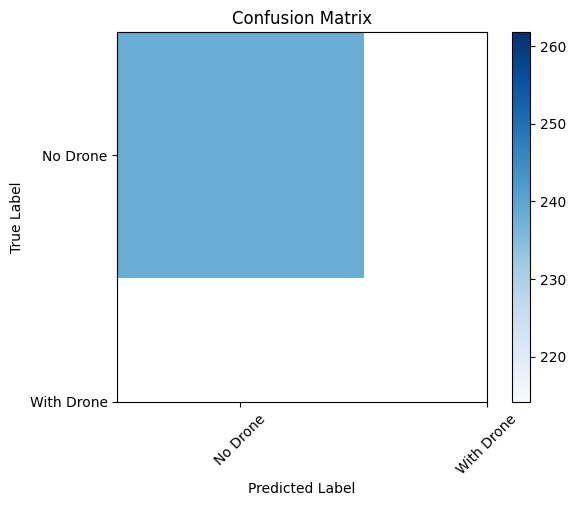

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Function to load and preprocess images from a folder
def load_and_preprocess(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Normalize pixel values between 0 and 1
            normalized_image = image / 255.0

            images.append(normalized_image.flatten())  # Flatten the matrix to a vector
            labels.append(1 if "with_drone" in folder else 0)

    return np.array(images), np.array(labels)

# Load and preprocess images from train and test folders
train_images, train_labels = load_and_preprocess("/content/drive/MyDrive/train")
test_images, test_labels = load_and_preprocess("/content/drive/MyDrive/test")

# Split the data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15, random_state=42
)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_images.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(test_images)
rounded_predictions = np.round(predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, rounded_predictions)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Drone', 'With Drone']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Epoch 1/10
23/23 [==============================] - 3s 19ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 5.3911e-05 - val_mse: 5.3911e-05
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 4.3951e-04 - mse: 4.3951e-04 - val_loss: 2.5042e-05 - val_mse: 2.5042e-05
Epoch 3/10
23/23 [==============================] - 0s 15ms/step - loss: 4.0993e-04 - mse: 4.0993e-04 - val_loss: 1.5230e-05 - val_mse: 1.5230e-05
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 3.7088e-04 - mse: 3.7088e-04 - val_loss: 7.4234e-06 - val_mse: 7.4234e-06
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 3.5064e-04 - mse: 3.5064e-04 - val_loss: 4.7851e-06 - val_mse: 4.7851e-06
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 3.0400e-04 - mse: 3.0400e-04 - val_loss: 2.9006e-06 - val_mse: 2.9006e-06
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 2.8099e-04 - mse: 2.8099e-04 - val_loss: 1.9403e-06 - 

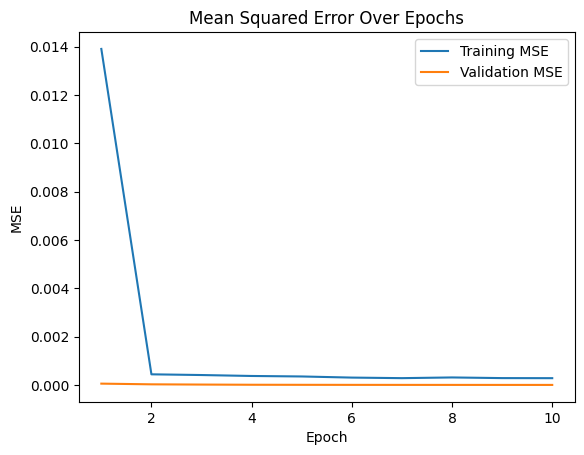

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Function to load and preprocess images from a folder
def load_and_preprocess(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Normalize pixel values between 0 and 1
            normalized_image = image / 255.0

            images.append(normalized_image.flatten())  # Flatten the matrix to a vector
            labels.append(1 if "with_drone" in folder else 0)

    return np.array(images), np.array(labels)

# Load and preprocess images from train and test folders
train_images, train_labels = load_and_preprocess("/content/drive/MyDrive/train")
test_images, test_labels = load_and_preprocess("/content/drive/MyDrive/test")

# Split the data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15, random_state=42
)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_images.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model and obtain history
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Extract Mean Squared Error (MSE) values from the history object
mse_values = history.history['mse']
val_mse_values = history.history['val_mse']

# Plot the MSE values over epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='Training MSE')
plt.plot(range(1, len(val_mse_values) + 1), val_mse_values, label='Validation MSE')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


Epoch 1/3
90/90 [==============================] - 2s 5ms/step - loss: 0.0085 - accuracy: 0.9958 - val_loss: 1.8496e-04 - val_accuracy: 1.0000
Epoch 2/3
90/90 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.7268e-05 - val_accuracy: 1.0000
Epoch 3/3
8/8 [==============================] - 0s 3ms/step - loss: 2.0486e-07 - accuracy: 1.0000

Test Accuracy: 1.0000
8/8 [==============================] - 0s 2ms/step


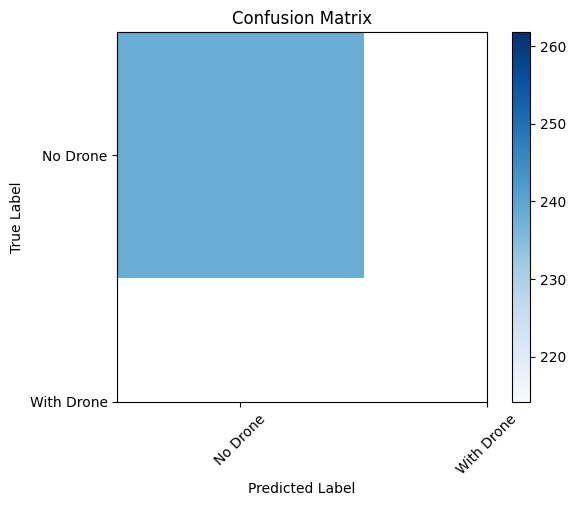

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Function to load and preprocess images from a folder
def load_and_preprocess(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Normalize pixel values between 0 and 1
            normalized_image = image / 255.0

            images.append(normalized_image.flatten())  # Flatten the matrix to a vector
            labels.append(1 if "with_drone" in folder else 0)

    return np.array(images), np.array(labels)

# Load and preprocess images from train and test folders
train_images, train_labels = load_and_preprocess("/content/drive/MyDrive/train")
test_images, test_labels = load_and_preprocess("/content/drive/MyDrive/test")

# Split the data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15, random_state=42
)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_images.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=3, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(test_images)
rounded_predictions = np.round(predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, rounded_predictions)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Drone', 'With Drone']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


write a program that shows a graph of MSE

Epoch 1/3
90/90 [==============================] - 1s 4ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 4.3402e-04 - val_mse: 4.3402e-04
Epoch 2/3
90/90 [==============================] - 0s 4ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 2.9497e-04 - val_mse: 2.9497e-04
Epoch 3/3
90/90 [==============================] - 0s 3ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 2.2325e-04 - val_mse: 2.2325e-04


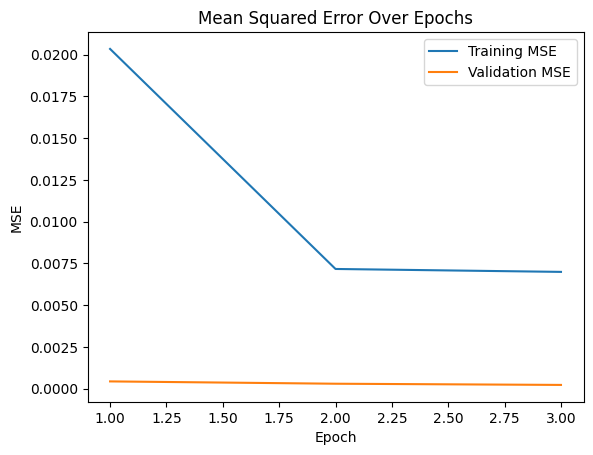

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Function to load and preprocess images from a folder
def load_and_preprocess(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Read the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Normalize pixel values between 0 and 1
            normalized_image = image / 255.0

            images.append(normalized_image.flatten())  # Flatten the matrix to a vector
            labels.append(1 if "with_drone" in folder else 0)

    return np.array(images), np.array(labels)

# Load and preprocess images from train and test folders
train_images, train_labels = load_and_preprocess("/content/drive/MyDrive/train")
test_images, test_labels = load_and_preprocess("/content/drive/MyDrive/test")

# Split the data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15, random_state=42
)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(train_images.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model and obtain history
history = model.fit(train_images, train_labels, epochs=3, batch_size=8, validation_data=(val_images, val_labels))

# Extract Mean Squared Error (MSE) values from the history object
mse_values = history.history['mse']
val_mse_values = history.history['val_mse']

# Plot the MSE values over epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='Training MSE')
plt.plot(range(1, len(val_mse_values) + 1), val_mse_values, label='Validation MSE')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


take this code and make it better by adding a 2d CNN and maxPooling then Fullconection and calification if there is or there isn't a drone in the image. make a confusion graph and MSE graph

In [ ]:
pip install tensorflow scikit-learn matplotlib


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 16s 11ms/step - loss: 0.1922 - accuracy: 0.9449 - val_loss: 0.0854 - val_accuracy: 0.9753
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0594 - val_accuracy: 0.9821
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0584 - val_accuracy: 0.9835
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0511 - val_accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9863
Test Accuracy: 98.63%
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 974    1    0    1    0    0    4    0    0    0]
 [   0 1129    1    1    0    0    1    2    1    0]
 [   0    1 1021    0    1    0    0    7    2    0]
 [   0    0    3

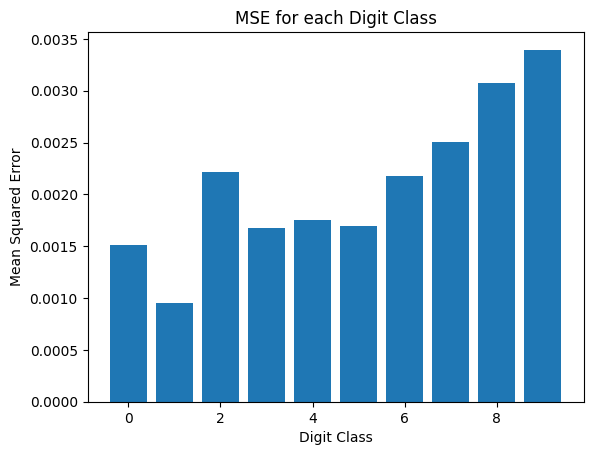

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Mean Squared Error (MSE) graph
y_pred_prob = model.predict(x_test)
mse_values = []
for i in range(10):
    mse = mean_squared_error(y_test[:, i], y_pred_prob[:, i])
    mse_values.append(mse)

# Plot the MSE values
plt.bar(range(10), mse_values)
plt.xlabel('Digit Class')
plt.ylabel('Mean Squared Error')
plt.title('MSE for each Digit Class')
plt.show()
